In [115]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import heapq
from scipy.stats import poisson 
import seaborn as sns
from scipy.signal import butter, filtfilt,welch


In [116]:
L,P,inh,Trest,Treltive,apha,t=np.loadtxt("input.txt")
    

low_cutoff = 0.5  # Low cut-off frequency (Hz)
high_cutoff = 50.0  # High cut-off frequency (Hz)
order = 4  # Order of the filter
sampling_rate = 500  # Example sampling rate in Hz

# Create the Butterworth band-pass filter
b, a = butter(order, [low_cutoff / (0.5 * sampling_rate), high_cutoff / (0.5 * sampling_rate)], btype='band')

data = np.loadtxt("data.dat")[30:,:]
filtered_data_a = filtfilt(b, a, data[:,0])
filtered_data_b = filtfilt(b, a, data[:,1])
    
    

    
NFFT = 256
OVERLAP = NFFT/2 # Time scale
dt = 1.0 / 100.0 # dt de la toma de datos 1/100 siendo la frecuencia de los datos
fs = 1.0 / dt # frecuencia de la muestra cada 100 cs



# Calcular la PSD usando el método de Welch
frequencies_a, psd_a = welch(filtered_data_a, fs, nperseg=fs*4,noverlap=fs*2)
alplitud_a=np.zeros_like(psd_a)
# Imprimir los resultados
for i in range(len(frequencies_a)):
   alplitud_a[i]=10 * np.log10(psd_a[i])

frequencies_b, psd_b = welch(filtered_data_b, fs, nperseg=fs*4)
alplitud_b=np.zeros_like(psd_b)
    # Imprimir los resultados
for i in range(len(frequencies_b)):
    alplitud_b[i]=10 * np.log10(psd_b[i])


reales=np.loadtxt("real.txt")[:1000]
f_reales, psd_reales = welch(reales, fs, nperseg=fs*4)
alplitud_rea=np.zeros_like(psd_reales)
# Imprimir los resultados
for i in range(len(f_reales)):
    alplitud_rea[i]=10 * np.log10(psd_reales[i])



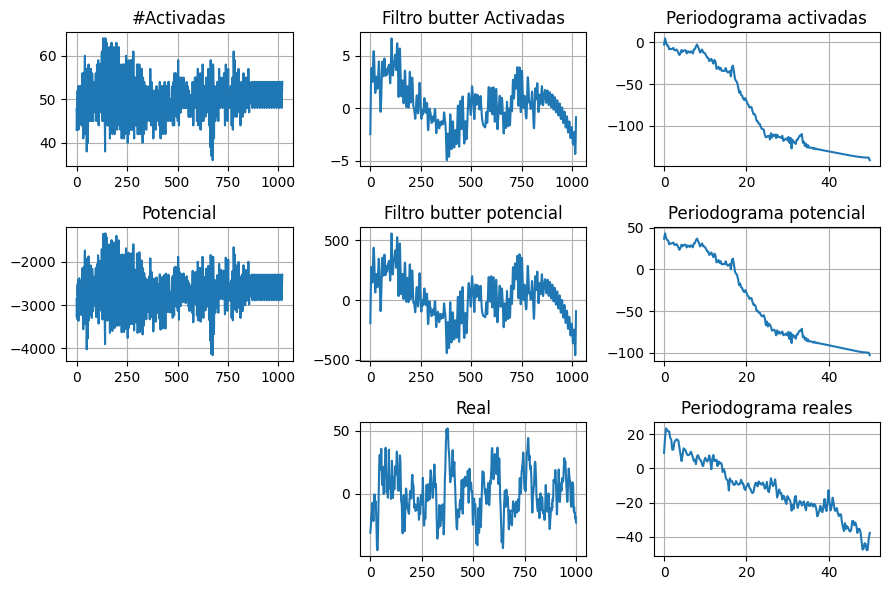

In [117]:
fig = plt.figure(figsize=(9, 6),num=f"L{L}p{P}in{inh}tr{Trest}te{Treltive}")
    
plt.subplot(3, 3, 1)
plt.plot(data[:,0], label='# Activadas')
plt.title("#Activadas")
plt.grid()
    
plt.subplot(3, 3, 4)
plt.plot(data[:,1], label='Potencial')
plt.title("Potencial")
plt.grid()
    

plt.subplot(3, 3, 2)
plt.plot(filtered_data_a, label='Filtro butter Activadas')
plt.title("Filtro butter Activadas")
plt.grid()


plt.subplot(3, 3, 5)
plt.plot(filtered_data_b, label='Filtro butter potencial')
plt.title("Filtro butter potencial")
plt.grid()
    
plt.subplot(3, 3, 3)
plt.plot(frequencies_a, alplitud_a, label='Potencial')
plt.title("Periodograma activadas")
plt.grid()
    
plt.subplot(3, 3, 6)
plt.plot(frequencies_b, alplitud_b, label='Potencial')
plt.title("Periodograma potencial")
plt.grid()
    
plt.subplot(3, 3, 8)
plt.plot(reales, label='reales')
plt.title("Real")
plt.grid()
    
plt.subplot(3, 3, 9)
plt.plot(f_reales, alplitud_rea, label='real')
plt.title("Periodograma reales")
plt.grid()
    

plt.tight_layout()

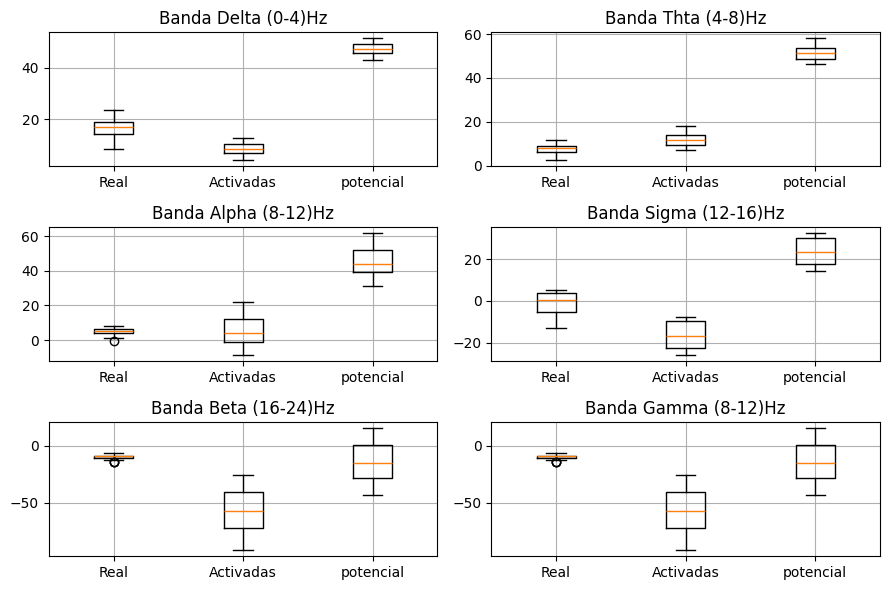

In [114]:
ig2 = plt.figure(figsize=(9, 6),num=f"Bandas_L{L}p{P}in{inh}tr{Trest}te{Treltive}")
    
plt.subplot(3, 2, 1)
D_low, D_high = 0.1, 4
delta_r = alplitud_rea[np.logical_and(f_reales >= D_low, f_reales <= D_high)]
delta_b = alplitud_b[np.logical_and(frequencies_b >= D_low, frequencies_b <= D_high)]
delta_a = alplitud_a[np.logical_and(frequencies_a >= D_low, frequencies_a <= D_high)]
plt.boxplot([delta_r,delta_a,delta_b],labels=['Real', 'Activadas',"potencial"])
plt.grid()
plt.title('Banda Delta (0-4)Hz')
    
plt.subplot(3, 2, 2)
th_low, th_high = 4, 8
theta_r = alplitud_rea[np.logical_and(f_reales > th_low, f_reales <= th_high)]
theta_b = alplitud_b[np.logical_and(frequencies_b > th_low, frequencies_b <= th_high)]
theta_a = alplitud_a[np.logical_and(frequencies_a > th_low, frequencies_a <= th_high)]
plt.boxplot([theta_r,theta_a,theta_b],labels=['Real', 'Activadas',"potencial"])
plt.grid()
plt.title('Banda Thta (4-8)Hz')
    

plt.subplot(3, 2, 3)
Al_low, Al_high = 8, 12
Al_r = alplitud_rea[np.logical_and(f_reales > Al_low, f_reales <= Al_high)]
Al_b = alplitud_b[np.logical_and(frequencies_b > Al_low, frequencies_b <= Al_high)]
Al_a = alplitud_a[np.logical_and(frequencies_a > Al_low, frequencies_a <= Al_high)]
plt.boxplot([Al_r,Al_a,Al_b],labels=['Real', 'Activadas',"potencial"])
plt.grid()
plt.title('Banda Alpha (8-12)Hz')


plt.subplot(3, 2, 4)
sig_low, sig_high = 12, 16
sig_r = alplitud_rea[np.logical_and(f_reales > sig_low, f_reales <= sig_high)]
sig_b = alplitud_b[np.logical_and(frequencies_b > sig_low, frequencies_b <= sig_high)]
sig_a = alplitud_a[np.logical_and(frequencies_a > sig_low, frequencies_a <= sig_high)]
plt.boxplot([sig_r,sig_a,sig_b],labels=['Real', 'Activadas',"potencial"])
plt.grid()
plt.title('Banda Sigma (12-16)Hz')
    
plt.subplot(3, 2, 5)
be_low, be_high = 16, 24
be_r = alplitud_rea[np.logical_and(f_reales > be_low, f_reales <= be_high)]
be_b = alplitud_b[np.logical_and(frequencies_b > be_low, frequencies_b <= be_high)]
be_a = alplitud_a[np.logical_and(frequencies_a > be_low, frequencies_a <= be_high)]
plt.boxplot([be_r,be_a,be_b],labels=['Real', 'Activadas',"potencial"])
plt.grid()
plt.title('Banda Beta (16-24)Hz')
    
plt.subplot(3, 2, 6)
gam_low, gam_high = 24, 30
gam_r = alplitud_rea[np.logical_and(f_reales > gam_low, f_reales <= gam_high)]
gam_b = alplitud_b[np.logical_and(frequencies_b > gam_low, frequencies_b <= gam_high)]
gam_a = alplitud_a[np.logical_and(frequencies_a > gam_low, frequencies_a <= gam_high)]
plt.boxplot([be_r,be_a,be_b],labels=['Real', 'Activadas',"potencial"])
plt.grid()
plt.title('Banda Gamma (8-12)Hz')
    
plt.tight_layout() 

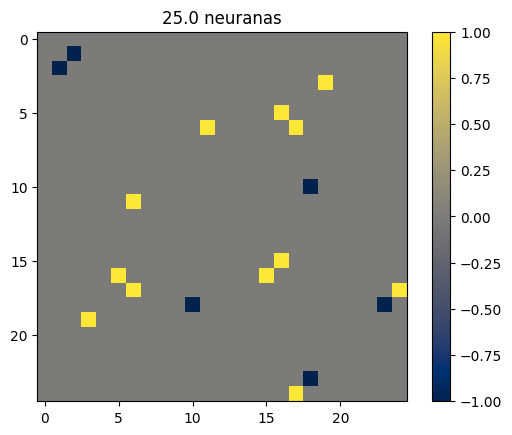

In [111]:
matriz = np.loadtxt('matriz.dat')

# Visualizar la matriz con imshow
plt.imshow(matriz, cmap='cividis')
# Muestra la gráfica
plt.title(f"{L*L} neuranas")
plt.colorbar()
plt.show()


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  1.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]


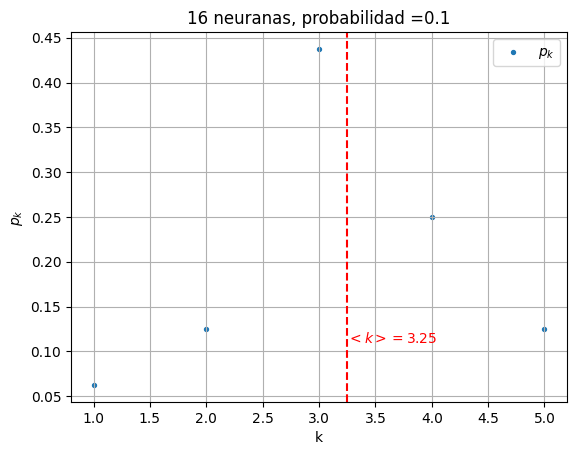

In [26]:
k=np.zeros(len(matriz))
for i in range(len(matriz)):
    k[i]=np.sum(abs(matriz[i])) 
    
    
    
unique_values, counts = np.unique(k, return_counts=True)
k_main=sum(k)/len(matriz)
    
    
    
sample1 = poisson.rvs(mu=k_main, size=100)    

#sns.kdeplot(x=sample1, fill=False,color="r", label=f'lambda={k_main}')
plt.figure(num=f"kp{P}")
plt.scatter(unique_values,counts/len(matriz),s=8,label=r"$p_k$")
plt.axvline(sum(k)/len(matriz),c="r",linestyle="--")
plt.grid()
plt.legend()
plt.xlabel("k")
plt.ylabel(r"$p_k$")
plt.title(f"{int(L*L)} neuranas, probabilidad ={P}")
plt.text(sum(k)/len(matriz),max(counts/len(matriz))/4,f"$<k>={sum(k)/len(matriz)}$",c="r")
plt.show()

In [93]:
import heapq

def dijkstra(graph, start):
    distances = {node: float('inf') for node in range(len(graph))}
    distances[start] = 0
    queue = [(0, start)]
    
    while queue:
        current_distance, current_node = heapq.heappop(queue)
        
        if current_distance > distances[current_node]:
            continue
        
        # Corrected iteration over neighbors
        for neighbor_index in range(len(graph)):
            weight = graph[current_node][neighbor_index]
            if weight == 1:  # Assuming weight 1 means there's an edge between nodes
                distance = current_distance + weight
                if distance < distances[neighbor_index]:
                    distances[neighbor_index] = distance
                    heapq.heappush(queue, (distance, neighbor_index))
    
    return distances


distances = dijkstra(matriz, 0)
print(distances)
    


{0: 0, 1: 2.0, 2: 3.0, 3: 2.0, 4: 2.0, 5: 2.0, 6: 2.0, 7: 3.0, 8: 3.0, 9: 3.0, 10: 2.0, 11: 3.0, 12: 2.0, 13: 2.0, 14: 3.0, 15: 2.0, 16: 2.0, 17: 2.0, 18: 2.0, 19: 3.0, 20: 1.0, 21: 3.0, 22: 3.0, 23: 3.0, 24: 2.0, 25: 2.0, 26: 3.0, 27: 2.0, 28: 2.0, 29: 2.0, 30: 2.0, 31: 3.0, 32: 3.0, 33: 2.0, 34: 2.0, 35: 3.0, 36: 3.0, 37: 2.0, 38: 3.0, 39: 3.0, 40: 2.0, 41: 2.0, 42: 2.0, 43: 2.0, 44: 3.0, 45: 3.0, 46: 3.0, 47: 3.0, 48: 2.0, 49: 2.0, 50: 2.0, 51: 2.0, 52: 3.0, 53: 2.0, 54: 2.0, 55: 3.0, 56: 3.0, 57: 3.0, 58: 2.0, 59: 3.0, 60: 3.0, 61: 3.0, 62: 2.0, 63: 2.0, 64: 3.0, 65: 2.0, 66: 2.0, 67: 2.0, 68: 2.0, 69: 2.0, 70: 2.0, 71: 2.0, 72: 2.0, 73: 3.0, 74: 2.0, 75: 2.0, 76: 3.0, 77: 2.0, 78: 3.0, 79: 2.0, 80: 2.0, 81: 3.0, 82: 3.0, 83: 3.0, 84: 3.0, 85: 3.0, 86: 3.0, 87: 3.0, 88: 2.0, 89: 3.0, 90: 2.0, 91: 3.0, 92: 3.0, 93: 2.0, 94: 2.0, 95: 2.0, 96: 3.0, 97: 2.0, 98: 3.0, 99: 3.0, 100: 3.0, 101: 2.0, 102: 1.0, 103: 3.0, 104: 2.0, 105: 3.0, 106: 2.0, 107: 2.0, 108: 2.0, 109: 3.0, 110: 2.0, 1

In [94]:
import heapq

def dijkstra_optimized(graph, start):
    # Convierte la matriz de adyacencia en una lista de vecinos para cada nodo
    neighbors = [[] for _ in range(len(graph))]
    for i in range(len(graph)):
        for j in range(i+1, len(graph)):
            if graph[i][j] == 1:  # Asume que 1 significa que hay una arista entre los nodos
                neighbors[i].append(j)
                neighbors[j].append(i)

    distances = {node: float('inf') for node in range(len(graph))}
    distances[start] = 0
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_distance > distances[current_node]:
            continue

        # Itera sobre los vecinos directos del nodo actual
        for neighbor in neighbors[current_node]:
            distance = current_distance + 1  # Asume que el peso de la arista es 1
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))

    return distances

# Asumiendo que 'matriz' es una matriz de adyacencia de tamaño 40x40
distances = dijkstra_optimized(matriz, 0)
print(distances)


{0: 0, 1: 2, 2: 3, 3: 2, 4: 2, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3, 10: 2, 11: 3, 12: 2, 13: 2, 14: 3, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 1, 21: 3, 22: 3, 23: 3, 24: 2, 25: 2, 26: 3, 27: 2, 28: 2, 29: 2, 30: 2, 31: 3, 32: 3, 33: 2, 34: 2, 35: 3, 36: 3, 37: 2, 38: 3, 39: 3, 40: 2, 41: 2, 42: 2, 43: 2, 44: 3, 45: 3, 46: 3, 47: 3, 48: 2, 49: 2, 50: 2, 51: 2, 52: 3, 53: 2, 54: 2, 55: 3, 56: 3, 57: 3, 58: 2, 59: 3, 60: 3, 61: 3, 62: 2, 63: 2, 64: 3, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 3, 74: 2, 75: 2, 76: 3, 77: 2, 78: 3, 79: 2, 80: 2, 81: 3, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 3, 88: 2, 89: 3, 90: 2, 91: 3, 92: 3, 93: 2, 94: 2, 95: 2, 96: 3, 97: 2, 98: 3, 99: 3, 100: 3, 101: 2, 102: 1, 103: 3, 104: 2, 105: 3, 106: 2, 107: 2, 108: 2, 109: 3, 110: 2, 111: 2, 112: 2, 113: 2, 114: 3, 115: 2, 116: 3, 117: 2, 118: 2, 119: 3, 120: 2, 121: 3, 122: 1, 123: 2, 124: 3, 125: 3, 126: 3, 127: 2, 128: 3, 129: 3, 130: 2, 131: 3, 132: 3, 133: 2, 134: 3, 135: 3, 136: 3, 137: 2, 138: 

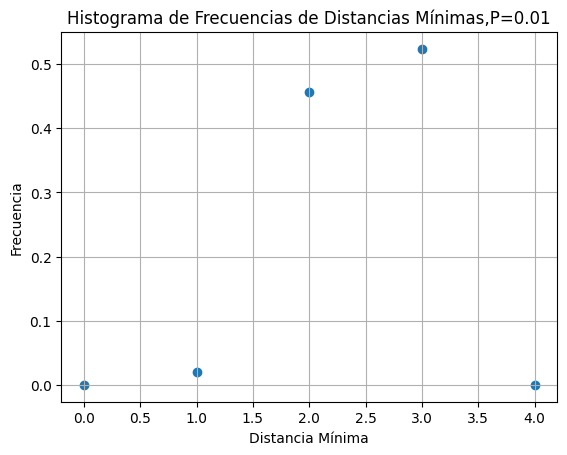

In [95]:
import matplotlib.pyplot as plt
from collections import defaultdict

distances = defaultdict(int)  # Usaremos defaultdict para facilitar el conteo de frecuencias

for i in range(int(L*L)): 
    distances[i] = dijkstra_optimized(matriz, i)  # Asume que esta función devuelve un diccionario de distancias

all_distances = []
for value_dict in distances.values():
    all_distances.extend(value_dict.values())

# Ahora, contamos las frecuencias de las distancias únicas
unique_distances = set(all_distances)
total_frequencies = len(unique_distances)

# Preparando los datos para el histograma
hist_data = [(distance, all_distances.count(distance)) for distance in unique_distances]
hist_data.sort()  # Ordenamos los datos para un histograma ordenado

# Creando el histograma
total=sum([item[1] for item in hist_data])
plt.scatter([item[0] for item in hist_data], np.array([item[1] for item in hist_data])/total)
plt.xlabel('Distancia Mínima')
plt.ylabel('Frecuencia')
plt.grid()
plt.title(f'Histograma de Frecuencias de Distancias Mínimas,P={P}')
plt.show()



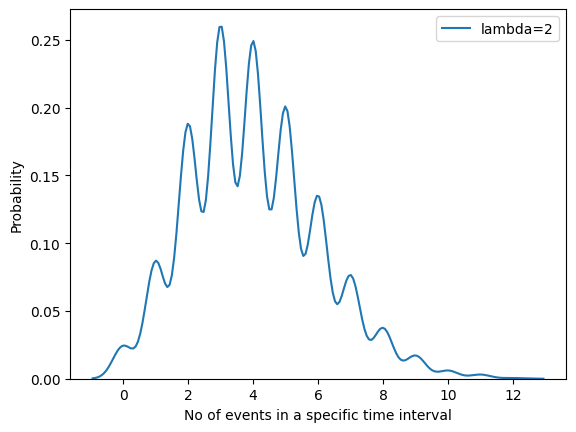

In [96]:
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt

#Generating Poisson data
sample1 = poisson.rvs(mu=4, size=10000)
#Plotting Poisson Distribution using Seaborn
sns.kdeplot(x=sample1, fill=False, label='lambda=2')
plt.xlabel('No of events in a specific time interval')
plt.ylabel('Probability')
plt.legend()
plt.show()

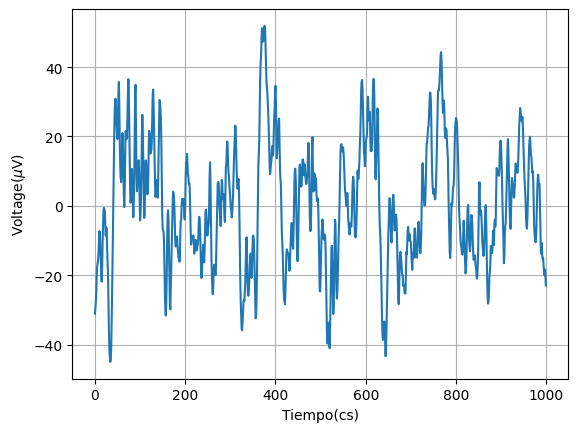

In [97]:
reales=np.loadtxt("real.txt")
plt.plot(reales[:1000])
plt.xlabel("Tiempo(cs)")
plt.ylabel(r"Voltage($\mu$V)")
plt.grid()

